In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
filename = '../data/csv/dpc-covid19-ita-province.csv'
df = pd.read_csv(filename)



In [8]:
d_from = '2020-03-01'
d_to = '2020-04-06'
#FIELD = 'totale_positivi'
FIELD = 'totale_casi'

#df = df[(df['data'] >= d_from) & (df['data'] <= d_to)]
df['data'] = pd.to_datetime(df['data'])
df = df[(df['data'] >= d_from)]
df = df[['data', 'denominazione_provincia', FIELD]]
df['data'] = df['data'].dt.strftime('%d/%m')


In [9]:

so_data = df[df['denominazione_provincia'].isin(['Sondrio'])]
so_data = so_data.drop(columns={"denominazione_provincia"})
so_data.tail(10)



,data,totale_casi
4282,28/03,388
4410,29/03,422
4538,30/03,446
4666,31/03,470
4794,01/04,484
4922,02/04,517
5050,03/04,537
5178,04/04,563
5306,05/04,591
5434,06/04,614


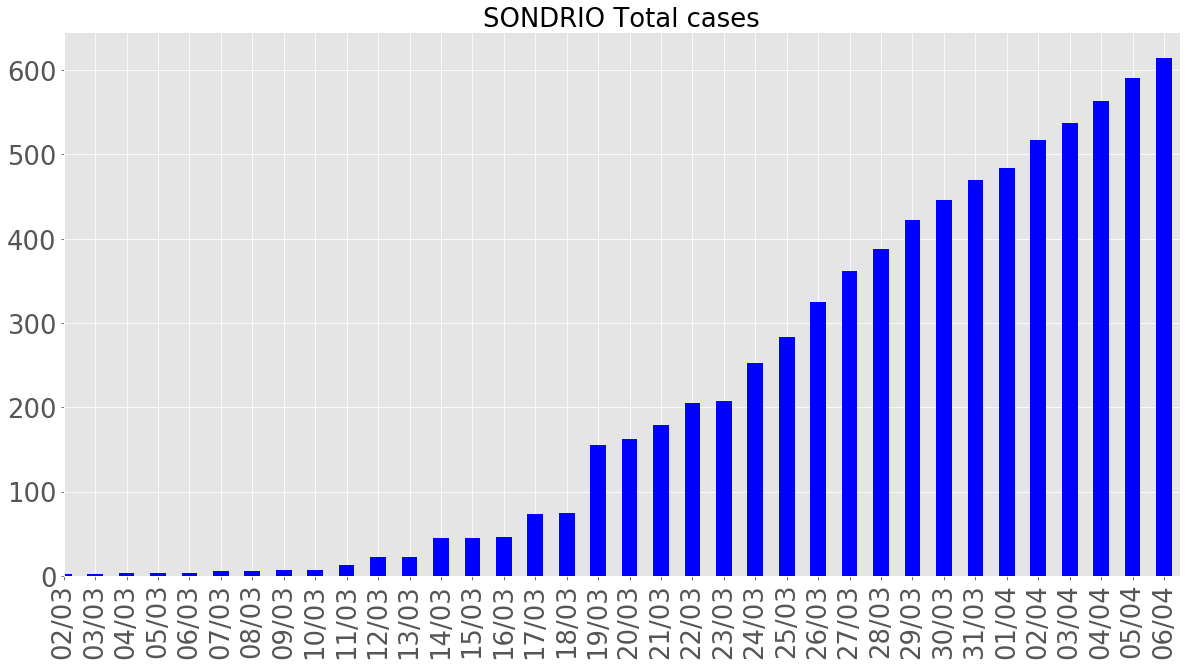

In [10]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.labelsize': 18})
#plt.rcParams['axes.facecolor'] = 'lightslategray'
plt.rcParams.update({'xtick.labelsize': 'x-large'})
plt.rcParams.update({'ytick.labelsize': 'x-large'})

#['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
# 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 
#'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk',  'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
#ax.set_axis_bgcolor("lightslategray")

ax = so_data.plot(x='data', y=FIELD, figsize=(20,10), kind='bar', color='b')

ax.set_xlabel('')

ax.xaxis.set_major_locator(MultipleLocator(1))

ax.set_xlim(left=1)
#ax.set_ylim(bottom=0)

ax.set_title('SONDRIO Total cases')
ax.get_legend().remove()


plt.show()